# Expectation Maximisation Model

(refer to page 98) Suppose ${X_i}$ are iid samples from a mixture distribution on $\mathbb{R}$ made up of 50 percent uniform distribution on $[-C,C]$ and 50 percent Gaussian with standard deviation 1 but unknown mean $\mu$:

$$p(x|\mu) = \frac{1}{\sqrt{2 \pi}} e^{-(x - \mu)^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(x)$$

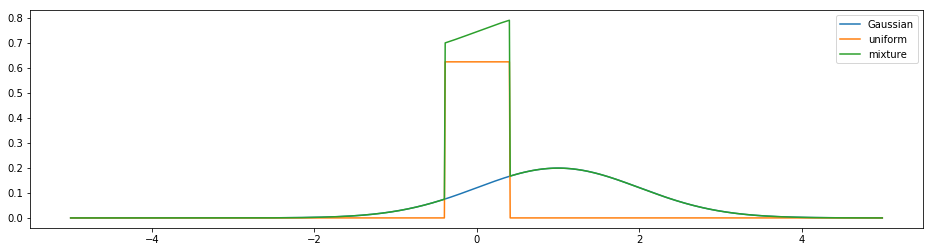

In [6]:
import numpy as np
import matplotlib.pyplot as plt

mu_true = 1
C = 0.4
res = 0.01  # resolution 
plot_range = np.arange(-5,5,res)
pdf_guassian = [(1./(2*np.sqrt(2*np.pi))) * np.exp(-(x - mu_true)**2. / 2.) for x in plot_range]
pdf_uniform = [0.25/C 
               if x > -C and x < C 
               else 0 
               for x in plot_range]
pdf_mixture = np.add(pdf_guassian,pdf_uniform)

plt.figure(figsize=(16,4))
plt.plot(plot_range,pdf_guassian, label="Gaussian")
plt.plot(plot_range,pdf_uniform, label="uniform")
plt.plot(plot_range,pdf_mixture, label="mixture")
plt.legend(loc="best")
plt.show()

Taking some samples:

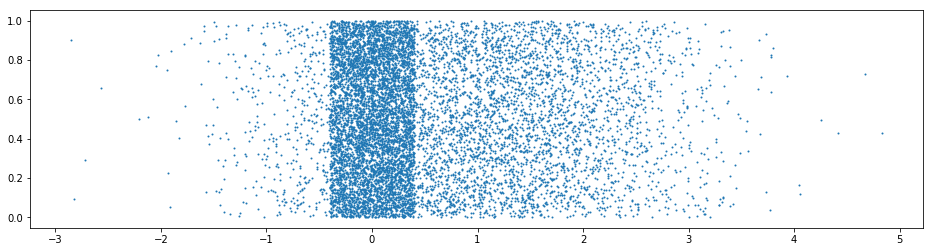

In [7]:
number_of_samples = 10000
dot_size = 1.
samples = [np.random.randn() + mu_true
           if np.random.random() > 0.5 
           else 2*C*np.random.random() - C
           for _ in range(number_of_samples)]

plt.figure(figsize=(16,4))
plt.scatter(samples,np.random.random(number_of_samples),s=dot_size)
plt.show()

# Maximising w.r.t. $\mu$

We want to maximise this with respect to $\mu$:

$$\prod_i \left( \frac{1}{2\sqrt{2 \pi}} e^{-(\hat{x}_i - \mu)^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(\hat{x}_i) \right) $$

It is better to work with the log of the expression instead:

$$\sum_i log \left( \frac{1}{2\sqrt{2 \pi}} e^{-(\hat{x}_i - \mu)^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(\hat{x}_i) \right)  $$

In [8]:
# inital guess
mu_guess = -0.
mu_test = mu_guess

In [9]:
res = 0.01  # resolution of plot
samples[:] = samples[:1000] # for s18n
number_of_samples = 1000  # for s18n
samples_t = samples[:1000]  # truncate for faster calculation

We proceed through a squence of guesses $\mu_n$ for the correct value of $\mu$. For each guess $\mu_n$, we consider the likelihood that $\hat{x}_i$ comes from the Guassian:

$$
L_i^{(n)} 
= \frac{\frac{1}{2\sqrt{2 \pi}} e^{-(x - \mu)^2 / 2}}
{\frac{1}{2\sqrt{2 \pi}} e^{-(x - \mu)^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(x)}
$$

Intuition - we are removing the block samples from the of uniform distribution, by reducing their weights.

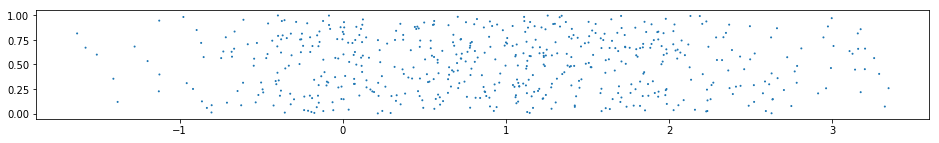

In [10]:
L_i = [1. if x_i < -C or x_i > C
    else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x_i - mu_test)**2. / 2.) /
    ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x_i - mu_test)**2. / 2.) + 1/(4.*C)) 
    for x_i in samples]

s = [1 if L > np.random.rand() else 0 for L in L_i]

plt.figure(figsize=(16,2))
plt.scatter(samples,np.random.random(number_of_samples), dot_size*np.array(s))
plt.show()

We define the new $\mu$ as the average of the $\hat{x}_i$ with these likelihoods as weights:

$$\mu_{n+1} = \frac{\sum_i L_i^{(n)} \hat{x}_i}{\sum_i L_i^{(n)}}$$

Intuition - we are simply taking the average of the samples from the Gaussian distribution. <br\>
Compare this expression with finding the average given a sample set - the demoninator is the sum.

1.0299999999997649


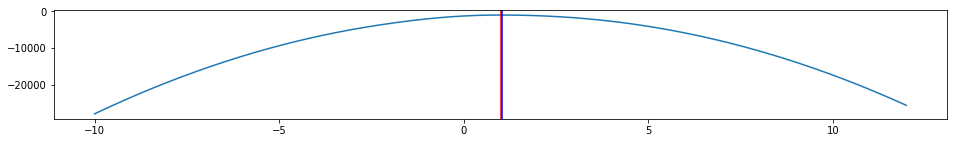

In [12]:
plot_range = np.arange(-10.,12.,0.01)
logexp = []

for mu_var in plot_range:
    gaussian = [1/(2.*np.sqrt(2.*np.pi))*np.exp(-(sample - mu_var)**2. / 2.)
            for sample in samples_t]
    uniform = [1/(4*C) if sample > -C and sample < C else 0 
           for sample in samples_t]
    mixture = np.add(gaussian,uniform)
    logexp.append(np.sum(np.log(mixture)))

plt.figure(figsize=(16,2))
plt.plot(plot_range,logexp)
plt.axvline(x=mu_true, color="r")
plt.axvline(x=plot_range[np.argmax(logexp)], color="b")
print(plot_range[np.argmax(logexp)])
plt.show()

0.97135327179


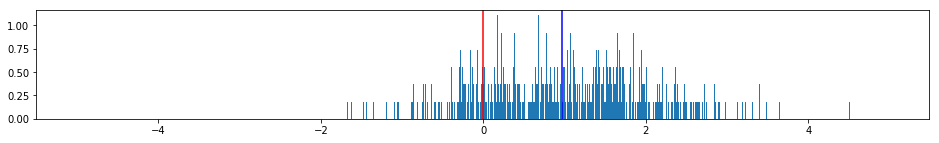

In [7]:
plt.figure(figsize=(16,2))
drop_zeroes = np.multiply(samples,s)
bins = np.arange(-5,5,res)
plt.hist(drop_zeroes[drop_zeroes!=0], normed=True, bins=bins)
plt.axvline(x=mu_test, color="r")

mu_new = np.sum(np.multiply(L_i,samples))/np.sum(L_i)  # change s to Li  
mu_test = mu_new
print mu_new

plt.axvline(x=mu_new, color="b")
plt.show()

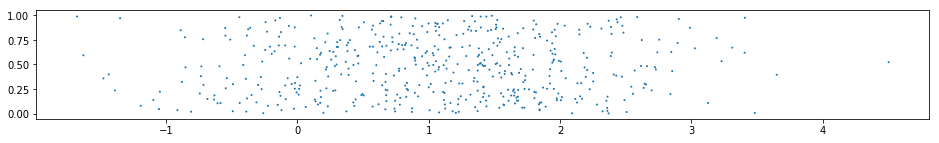

In [8]:
L_i = [1. if x < -C or x > C
    else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) /
    ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) + 1/(4.*C)) 
    for x in samples]

s = [1 if x > np.random.rand() else 0 for x in L_i]

plt.figure(figsize=(16,2))
plt.scatter(samples,np.random.random(number_of_samples), dot_size*np.array(s))
plt.show()

1.05945860725


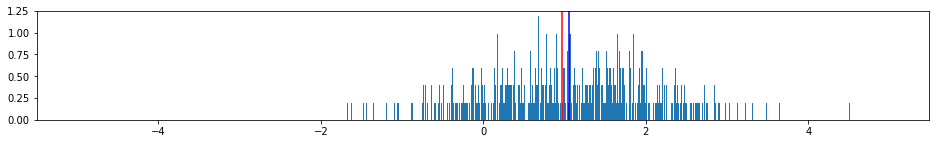

In [9]:
plt.figure(figsize=(16,2))
drop_zeroes = np.multiply(samples,s)
bins = np.arange(-5,5,res)
plt.hist(drop_zeroes[drop_zeroes!=0], normed=True, bins=bins)
plt.axvline(x=mu_test, color="r")

mu_new = np.sum(np.multiply(L_i,samples))/np.sum(L_i)  # change s to Li  
mu_test = mu_new
print mu_new

plt.axvline(x=mu_new, color="b")
plt.show()

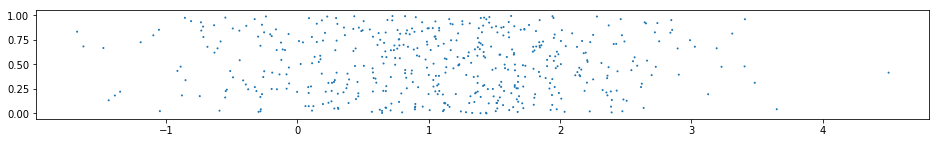

In [10]:
L_i = [1. if x < -C or x > C
    else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) /
    ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) + 1/(4.*C)) 
    for x in samples]

s = [1 if x > np.random.rand() else 0 for x in L_i]

plt.figure(figsize=(16,2))
plt.scatter(samples,np.random.random(number_of_samples), dot_size*np.array(s))
plt.show()

1.07386801905


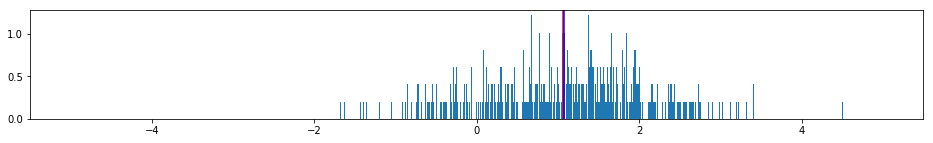

In [11]:
plt.figure(figsize=(16,2))
drop_zeroes = np.multiply(samples,s)
bins = np.arange(-5,5,res)
plt.hist(drop_zeroes[drop_zeroes!=0], normed=True, bins=bins)
plt.axvline(x=mu_test, color="r")

mu_new = np.sum(np.multiply(L_i,samples))/np.sum(L_i)  # change s to Li  
mu_test = mu_new
print mu_new

plt.axvline(x=mu_new, color="b")
plt.show()

In [12]:
L_i = [1. if x < -C or x > C
    else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) /
    ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) + 1/(4.*C)) 
    for x in samples]

mu_new = np.sum(np.multiply(L_i,samples))/np.sum(L_i)
mu_test = mu_new
print mu_new

1.07628505064


In [13]:
L_i = [1. if x < -C or x > C
    else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) /
    ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) + 1/(4.*C)) 
    for x in samples]

mu_new = np.sum(np.multiply(L_i,samples))/np.sum(L_i)
mu_test = mu_new
print mu_new

1.07669198128


In [14]:
#DONE plot w.r.t. mu
# where did the mu_{n=1} come from?
# verify pg100 expression?
# LG HMM model

We have this expression because the in the general case the hyperparamter has many elements, unlike this toy example where there is only $\mu$. For the general case it is infeasible to plot for all $\lambda$ due to the many dimensions.

Here we consider what is meant by $Q$ in the toy example:

$$
\begin{align}
Q(\lambda_{new},\lambda_{old}) 
&= \sum_y log(P(\hat{x},y \vert \lambda_{new})) \cdot P(y \vert \hat{x}, \lambda_{old}) \\
&= \sum_i log(P(x,g) \cdot L_i^{(n)} + \sum_i log(P(x,u) \cdot (1- L_i^{(n)}) \\
&= \sum_i log \left( \frac{1}{2\sqrt{2 \pi}} e^{-(\hat{x}_i - \mu_{new})^2 / 2} \right) 
\frac{\frac{1}{2 \sqrt{2 \pi}} e^{-(x - \mu_{old})^2 / 2}} 
{\frac{1}{2 \sqrt{2 \pi}} e^{-(x - \mu_{old})^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(x)} \\
&\quad + \sum_{i \space if \space x_i \in [-C,C]} log\left(  \frac{1}{4C} \right) 
\frac{\frac{1}{4C} \chi_{[-C,C]}(x)}
{\frac{1}{2 \sqrt{2 \pi}} e^{-(x - \mu_{old})^2 / 2} + \frac{1}{4C} \chi_{[-C,C]}(x)}
\end{align}
$$

Plotting Q for each $\mu_{new}$ given a $\mu_{old}$.

0.971


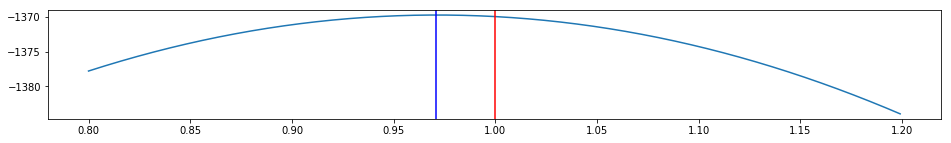

In [18]:
mu_old = -0.
plot_range = np.arange(0.8,1.2,0.001)
Q = []

for mu_new in plot_range:
    gaussian = [1./(2.*np.sqrt(2.*np.pi)) * np.exp(-(x_i - mu_new)**2. / 2.)
            for x_i in samples_t]
    uniform = [0 
           for x_i in samples_t]
    mixture = np.log(np.add(gaussian,uniform))

    L_i = [1. if x_i < -C or x_i > C
      else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x_i - mu_old)**2. / 2.) /
      ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x_i - mu_old)**2. / 2.) + 1/(4.*C)) 
      for x_i in samples_t]
            
    mixture_weighted = np.multiply(mixture,L_i)
    
    addednum = [0 
                if x_i < -C or x_i > C 
                else np.log(1/(4*C))
                for x_i in samples_t]
    addednum_weighted = np.multiply(addednum,np.add([1.]*len(L_i),-1*np.array(L_i)))
    Q.append(np.sum(np.add(mixture_weighted, addednum_weighted)))
    
plt.figure(figsize=(16,2))
plt.plot(plot_range,Q)
plt.axvline(x=mu_true, color="r")
plt.axvline(x=plot_range[np.argmax(Q)], color="b")
print(plot_range[np.argmax(Q)])

plt.show()

# print np.sum(np.log(mixture_weighted))

In [19]:
# perhaps this is the output the estimate given mu_old?

Plotting $\mu_{new}$ versus $\mu_{old}$

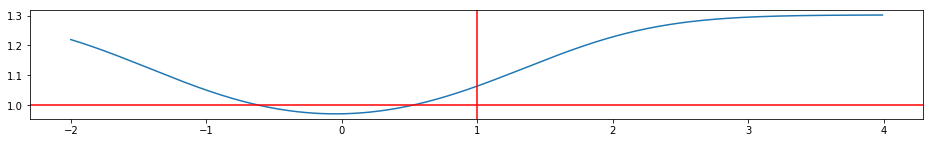

In [23]:
mu_next = []

plot_range = np.arange(-2,4,res)

for mu_test in plot_range:

    L_i = [1. if x < -C or x > C
        else (1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) /
        ((1./(2.*np.sqrt(2.*np.pi))) * np.exp(-(x - mu_test)**2. / 2.) + 1/(4.*C)) 
        for x in samples]

    mu_next.append(np.sum(np.multiply(L_i,samples))/np.sum(L_i))
    
plt.figure(figsize=(16,2))
plt.plot(plot_range,mu_next)
plt.axhline(y=mu_true, color="r")
plt.axvline(x=mu_true, color="r")
plt.show()

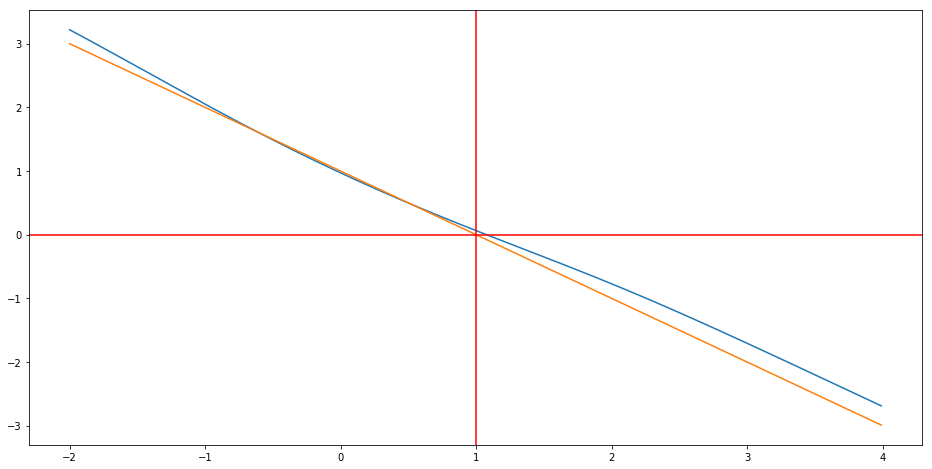

In [24]:
plt.figure(figsize=(16,8))
plt.plot(plot_range,np.add(mu_next,-np.arange(-2,4,res)))
plt.plot(plot_range,-np.arange(-2,4,res)+1)
plt.axhline(y=0, color="r")
plt.axvline(x=1, color="r")
plt.show()

In [ ]:
# write the uniform term mathematically accurately, x log x (when x tends to zero)
# label graphs, mu_new and mu_old

# express mu_old in terms of mu_new